In [1]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.1.0


In [1]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys






"Refaire avec le grand écran"
import numpy as np # Pour la manipulation de tableaux
from keras.applications import  resnet50
from sklearn import metrics 
import os

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones



from keras.layers import Dense, Conv2D # Pour instancier une couche dense
from keras.utils import np_utils

from keras.models import Sequential



from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model



import cv2
import keras
from numpy.random import seed
import tensorflow

from keras.preprocessing.image import ImageDataGenerator
import itertools # Pour créer des iterateurs

from sklearn import linear_model, preprocessing 



%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0


In [4]:
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
#model.summary()


TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.core.Dense object at 0x7fe560bda650>

In [4]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.


Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 864/1000 [========================>.....] - ETA: 0s - loss: 1.2156 - accuracy: 0.6528
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 576us/sample - loss: 1.1277 - accuracy: 0.6800 - val_loss: 0.7298 - val_accuracy: 0.7600
Epoch 2/10
 544/1000 [===============>..............] - ETA: 0s - loss: 0.4733 - accuracy: 0.8566
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 221us/sample - loss: 0.4264 - accuracy: 0.8680 - val_loss: 0.5433 - val_accuracy: 0.8300
Epoch 3/10
 512/1000 [==============>...............] - ETA: 0s - loss: 0.2452 - accuracy: 0.9492
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 235us/sample - loss: 0.2806 - accuracy: 0.9240 - val_loss: 0.4794 - val_accuracy: 0.8450
Epoch 4/10
 512/1000 [==============>...............] - ETA: 0s - loss: 0.1900 - accuracy: 0.9629
Epoch

In [5]:
def build_model(width, height, depth, classes):
	# initialize the input shape and channels dimension to be
	# "channels last" ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# build the model using Keras' Sequential API
	model = Sequential([

        
        
		# CONV => RELU => BN => POOL layer set
		Conv2D(16, (3, 3), padding="same", input_shape=inputShape),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 2 => POOL layer set
		Conv2D(32, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(32, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 3 => POOL layer set
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# first (and only) set of FC => RELU layers
		Flatten(),
		Dense(256),
		Activation("relu"),
		BatchNormalization(),
		Dropout(0.5),
		# softmax classifier
		Dense(classes),
		Activation("softmax")
	])
	# return the built model to the calling function
	return model

In [7]:
def build_model(width, height, depth, classes):
	# initialize the input shape and channels dimension to be
	# "channels last" ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# build the model using Keras' Sequential API
	model = Sequential([
		# CONV => RELU => BN => POOL layer set
		Conv2D(16, (3, 3), padding="same", input_shape=inputShape),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 2 => POOL layer set
		Conv2D(32, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(32, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 3 => POOL layer set
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# first (and only) set of FC => RELU layers
		Flatten(),
		Dense(256),
		Activation("relu"),
		BatchNormalization(),
		Dropout(0.5),
		# softmax classifier
		Dense(classes),
		Activation("softmax")
	])
	# return the built model to the calling function
	return model



In [8]:
# Create a basic model instance
#model = build_model(28, 28, 1, 10)
model = build_model(28, 28, 1, 10)
# Display the model's architecture
#model.summary()

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f758f13ba10>

In [14]:
model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])


model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])

ValueError: Error when checking input: expected conv2d_12_input to have 4 dimensions, but got array with shape (1000, 784)

In [21]:
import pandas as pd
df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")
df=df[(df["class"]=='corneille') | (df["class"]=='pigeon') | (df["class"]=='faisan')   ]
df.drop('labels',inplace=True,axis=1)
df.head()

,class,img_paths
2,corneille,Rec_images/DSCF0180_corneille_2.JPG
3,corneille,Rec_images/DSCF0180_corneille_3.JPG
4,pigeon,Rec_images/DSCF0258_pigeon_4.JPG
8,pigeon,Rec_images/DSCF0335_pigeon_8.JPG
10,pigeon,Rec_images/DSCF0341_pigeon_10.JPG


In [24]:
#Paramètres

#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=200
batch_size = 600
zoom_range = 1.25
horizontal_flip = True
Minimum_Number_Class=100
dropout_rate=0.3
#steps_per_epoch=len(data_train)//batch_size
steps_per_epoch=1
#validation_steps=len(data_test)//batch_size
validation_steps=1


In [25]:
#df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")


base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur_bigger.csv'

df=pd.read_csv(generateur_path)
df.drop('labels',inplace=True,axis=1)

df["class"].unique()
for c in df:
    print(''+c+':',len(df[c].unique()))
df["class"].unique()


All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>Minimum_Number_Class:
        Utilisable.append(i)
Utilisable
Non_Utilisable=set(All_Unique)-set(Utilisable)
Non_Utilisable
for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  
df["class"].unique()


for i in range(len(df["class"])):
    image_name=df["img_paths"].iloc[i]
    df["img_paths"].iloc[i]=os.path.join(base_img_paths,image_name)
    
    
    
    
    
    
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = dropout_rate)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

class: 13
img_paths: 6220


In [26]:
seed(1)
tensorflow.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = len(data_train) )


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = len(data_test))

gen=train_generator[0]

x_train=gen[0]
y_train=gen[1]



gen_test=test_generator[0]

x_test=gen_test[0]
y_test=gen_test[1]

Found 4772 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.


test_size 0.2
epochs 10
batch_size 600
zoom_range 1
horizontal_flip  False
dropout_rate 0


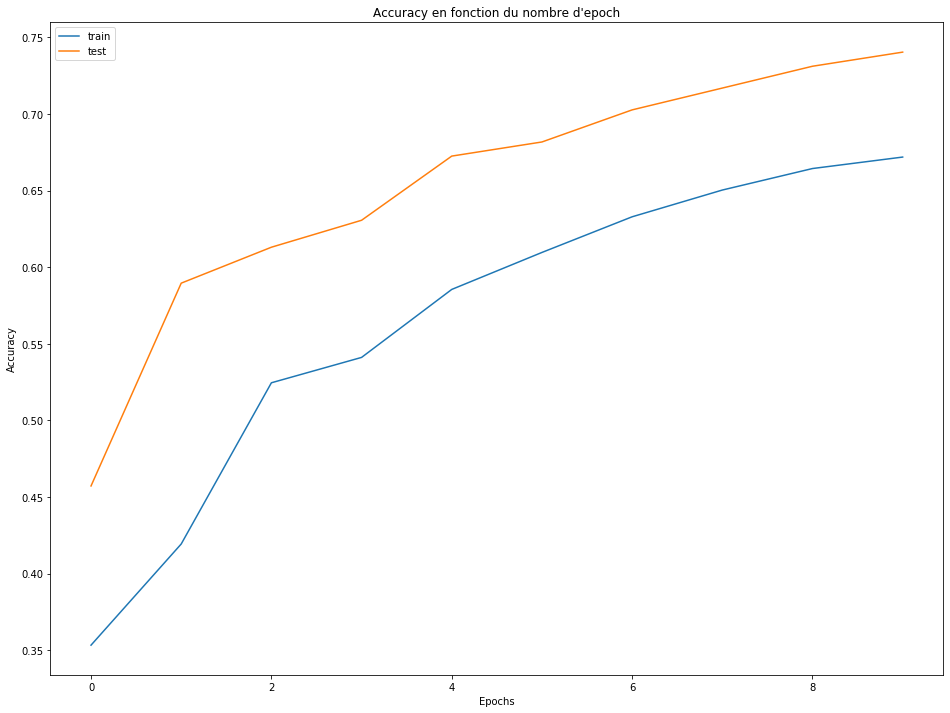

In [27]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=10
batch_size = 600
zoom_range = 1
horizontal_flip = False
dropout_rate=0



val_accuracy=[]
accuracy=[]

"""datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)"""


#datagen = ImageDataGenerator(
#   )

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
#lenet.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

longueur=round(len(x_train)) 

history=lenet.fit(x_train, y_train,validation_data=(x_test,y_test),verbose=0,
                 steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_steps=len(data_test)//batch_size)



# here's a more "manual" example
"""for e in range(epochs):
    batches = 0
    #for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
        history=lenet.fit(x_batch, y_batch,validation_data=(x_test,y_test),verbose=0)
        val_accuracy.append(history.history["val_accuracy"])
        accuracy.append(history.history["accuracy"])
        batches += 1
        if batches >= len(x_train) / longueur:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break """
            

            
print("test_size",test_size)
print("epochs",epochs)
print("batch_size",batch_size)
print("zoom_range",zoom_range)
print("horizontal_flip ",horizontal_flip )
print("dropout_rate",dropout_rate)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy en fonction du nombre d'epoch");

In [29]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=10
batch_size = 600
zoom_range = 1
horizontal_flip = False
dropout_rate=0



val_accuracy=[]
accuracy=[]


#                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

longueur=round(len(x_train)) 

In [33]:
# Create a basic model instance
#model = build_model(28, 28, 1, 6)
model = build_model(28, 28, 1, 10)

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f148c3a7dd0>

In [29]:
model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])


model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f148c41fa10>

In [ ]:
history=lenet.fit(x_train, y_train,validation_data=(x_test,y_test),verbose=0,
                 steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_steps=len(data_test)//batch_size)




            